<a href="https://colab.research.google.com/github/MOHAN-DATTA-24/Machine_Learning_G/blob/main/Titanic(with%20LOG%2CSVC%2CDT%2CKNN%2CNB%2CRF)_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#**Loading Dataset**

In [58]:
df = pd.read_csv("titanic_data.csv")

In [15]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Types of Features**

**Categorical** - Sex and Embarked<br>
**Continuous** - Age and Fare<br>
**Discrete** - SibSp and Parch<br>
**Alphanumeric** - Cabin

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

#**Numerical Analysis**

<Axes: >

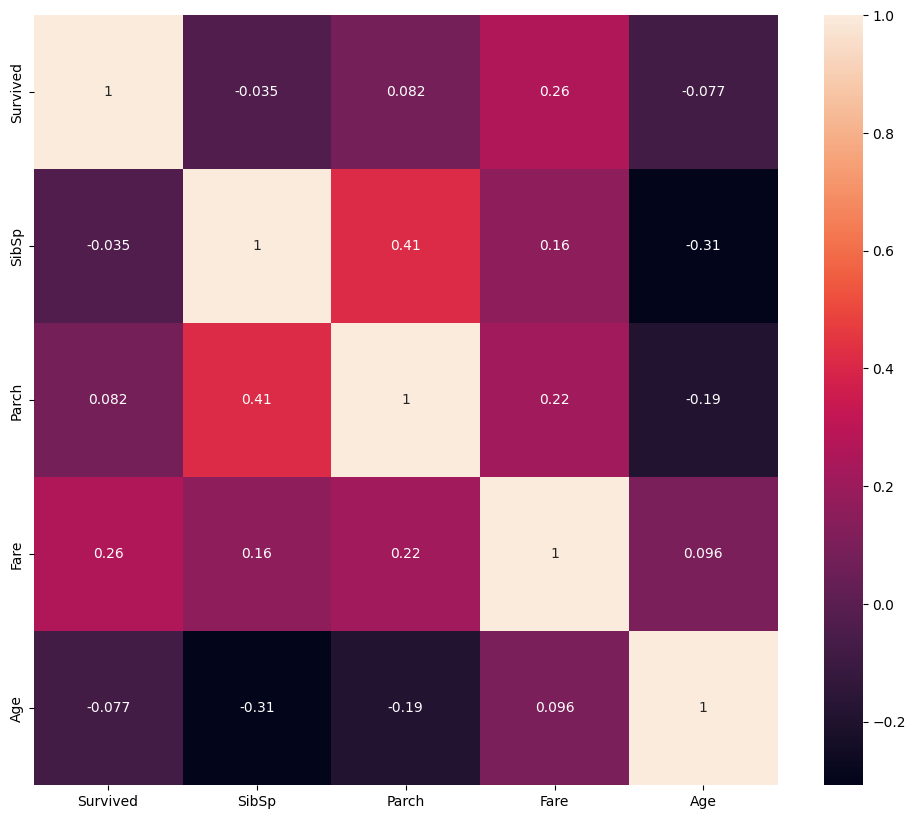

In [19]:
plt.figure(figsize = (12,10))
sns.heatmap(df[['Survived','SibSp','Parch','Fare','Age']].corr(),annot=True)

#SibSp - Number of Sibling/Spouses abroad the Titanic

In [22]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [23]:
df['SibSp'].nunique()

7

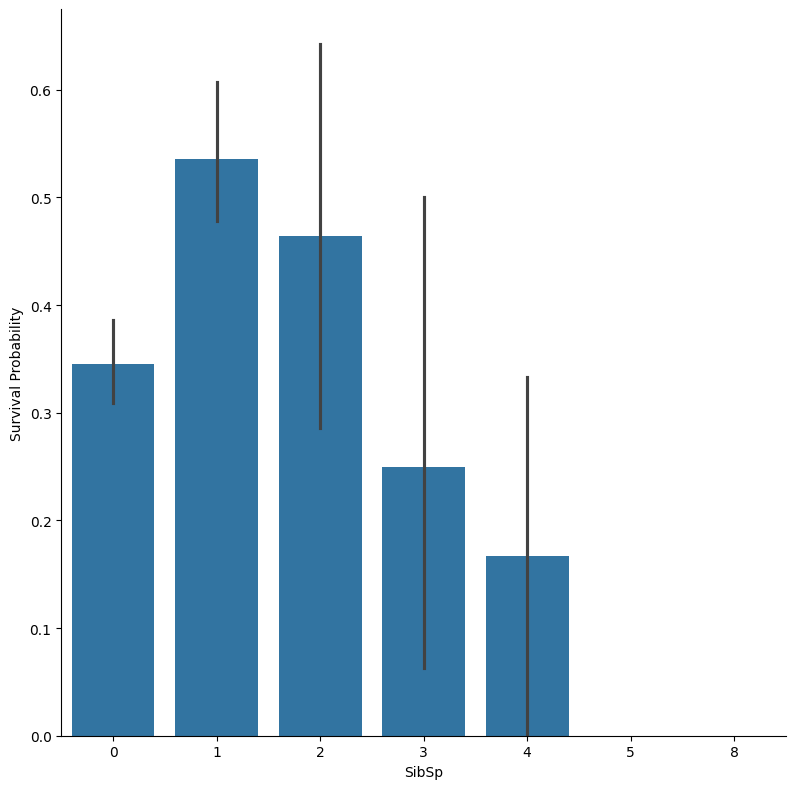

In [28]:
sns.catplot(x='SibSp',y= 'Survived',data = df,kind = 'bar',height=8 ).set_ylabels("Survival Probability")

#Age

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


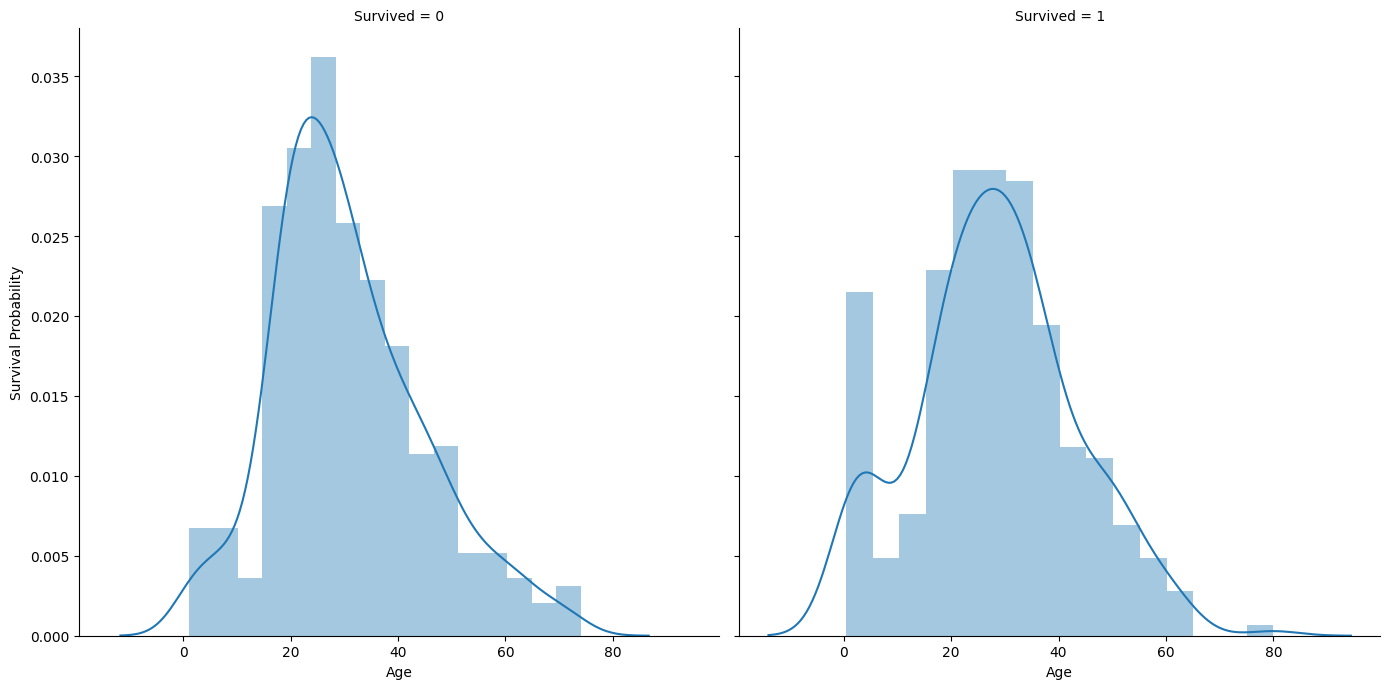

In [31]:
age_visual = sns.FacetGrid(df,col='Survived',height = 7)
age_visual = age_visual.map(sns.distplot,"Age").set_ylabels("Survival Probability")

#Sex

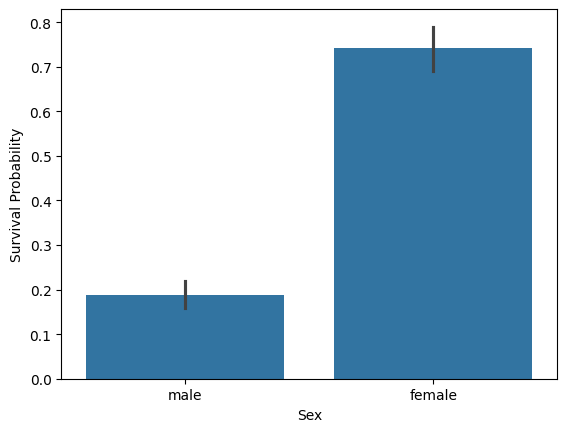

In [33]:
age_plot = sns.barplot(x="Sex",y="Survived",data=df).set_ylabel("Survival Probability")

In [34]:
df[['Sex','Survived']].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


#Passenger-Class

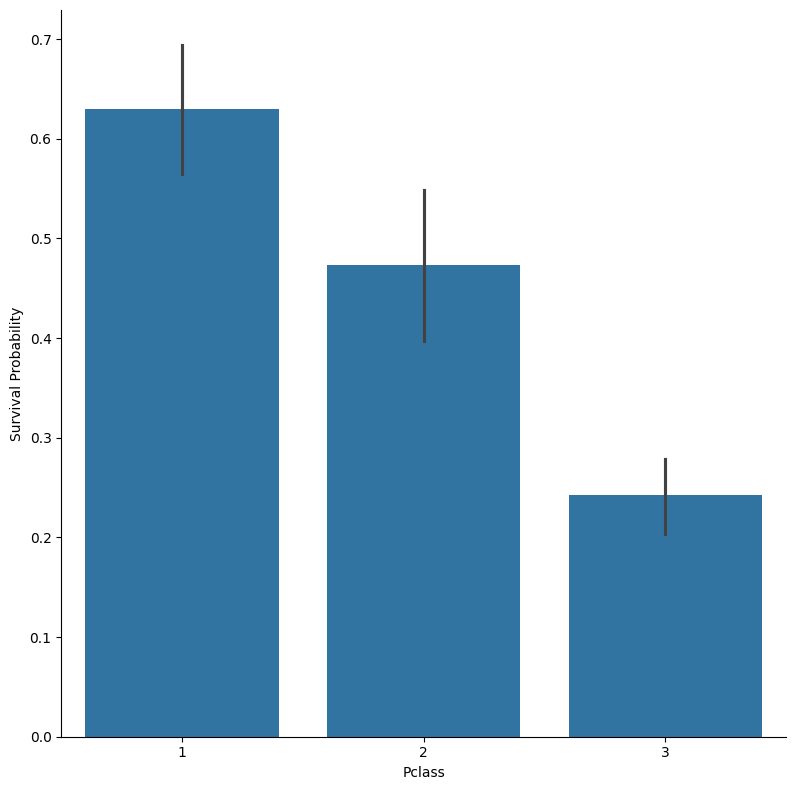

In [38]:
pclas = sns.catplot(x='Pclass',y= 'Survived',data = df,kind = 'bar',height=8).set_ylabels("Survival Probability")

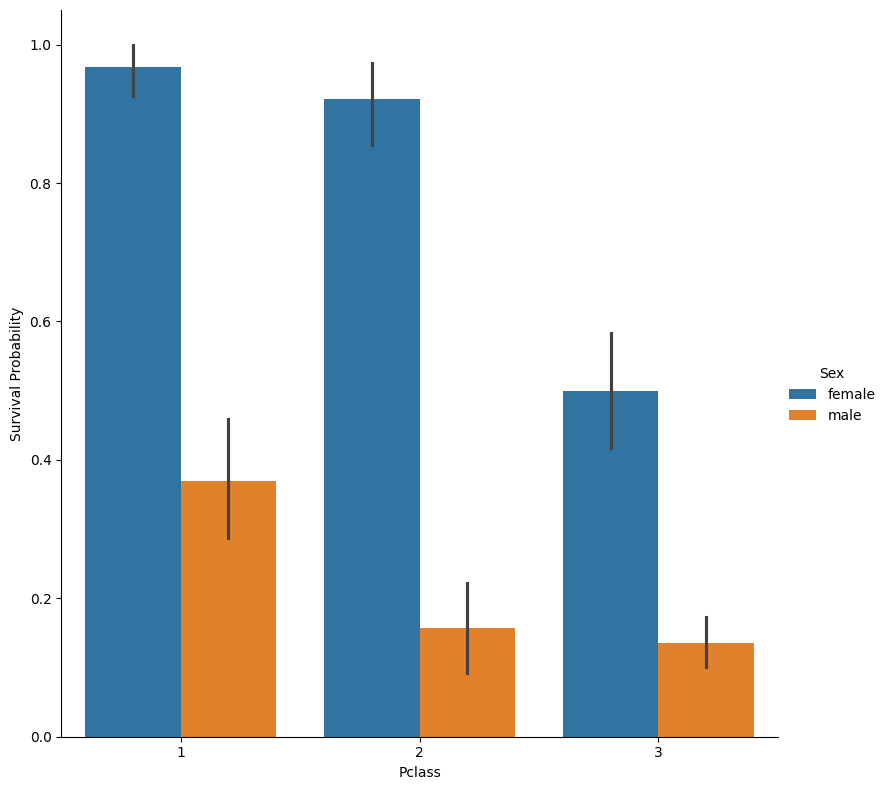

In [36]:
pclas = sns.catplot(x='Pclass',y= 'Survived',data = df,kind = 'bar',height=8, hue ='Sex').set_ylabels("Survival Probability")

#Embarked

In [40]:
df["Embarked"].isnull().sum()

2

In [41]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [42]:
df["Embarked"] = df["Embarked"].fillna('S')

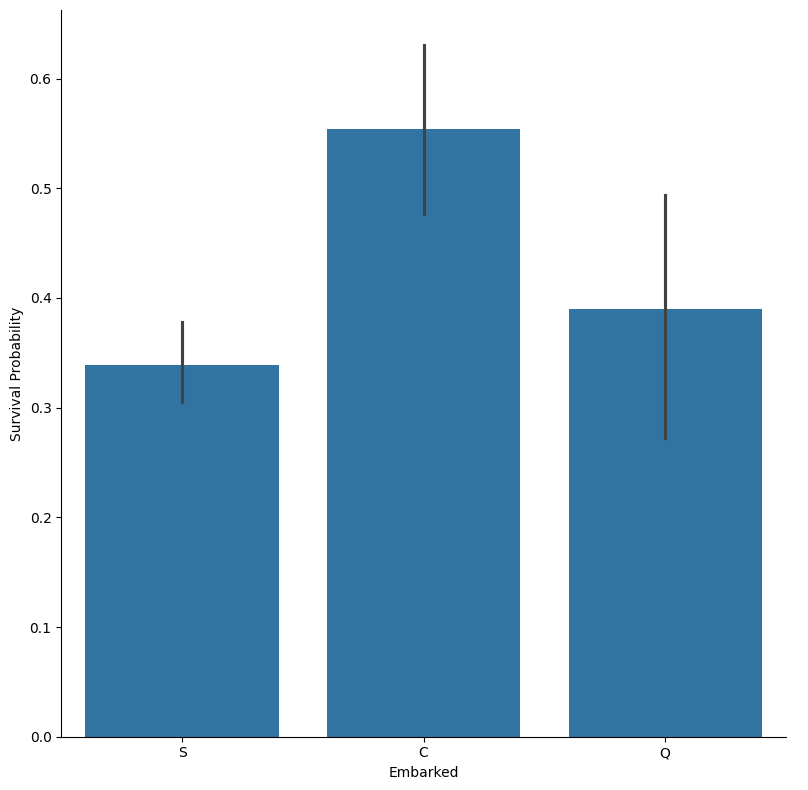

In [45]:
g = sns.catplot(x='Embarked',y= 'Survived',data = df,kind = 'bar',height=8).set_ylabels("Survival Probability")

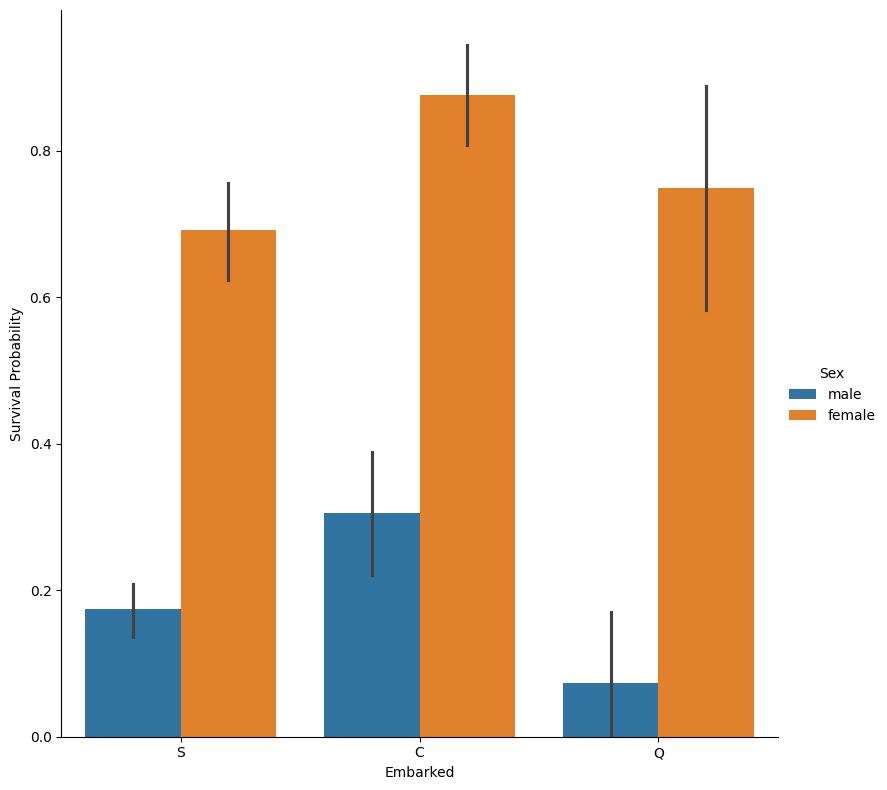

In [43]:
g = sns.catplot(x='Embarked',y= 'Survived',data = df,kind = 'bar',height=8, hue ='Sex').set_ylabels("Survival Probability")

## Explore Pclass vs Embarked

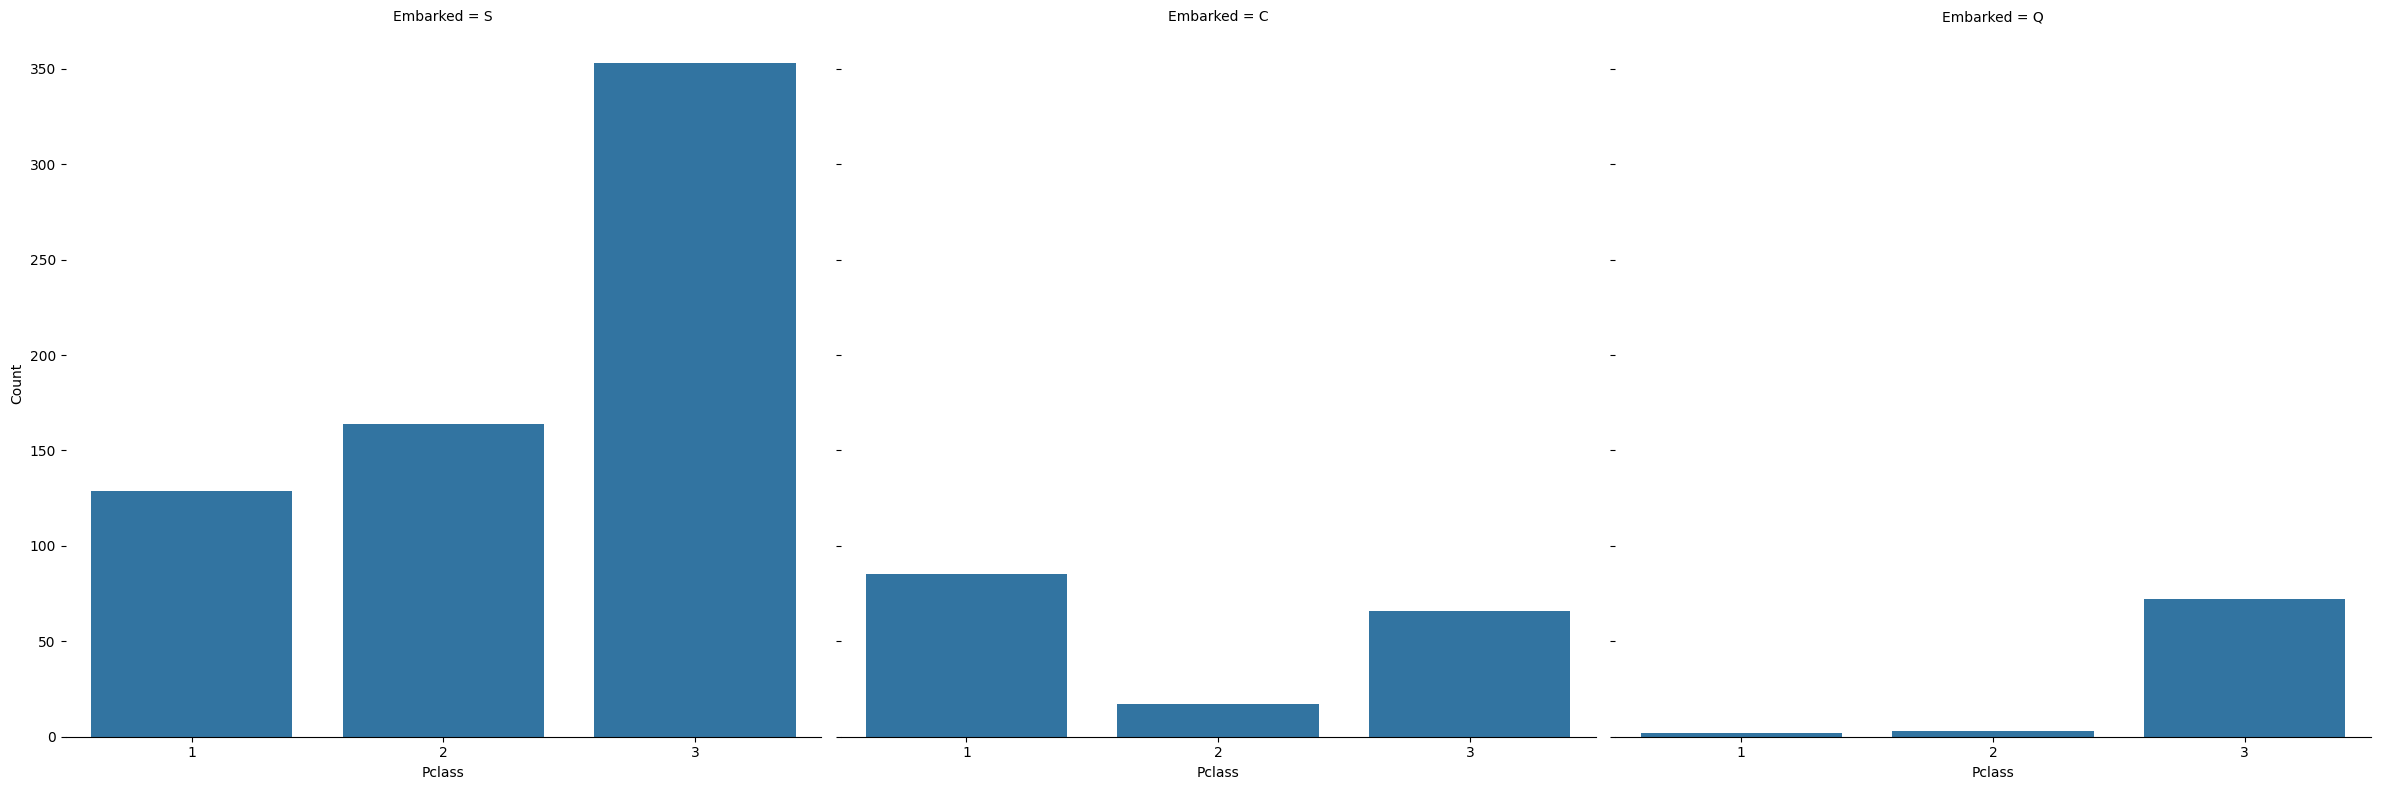

In [54]:
g = sns.catplot(x='Pclass', col='Embarked', data=df, kind='count', height=8)
g.despine(left=True)
g.set_ylabels("Count")

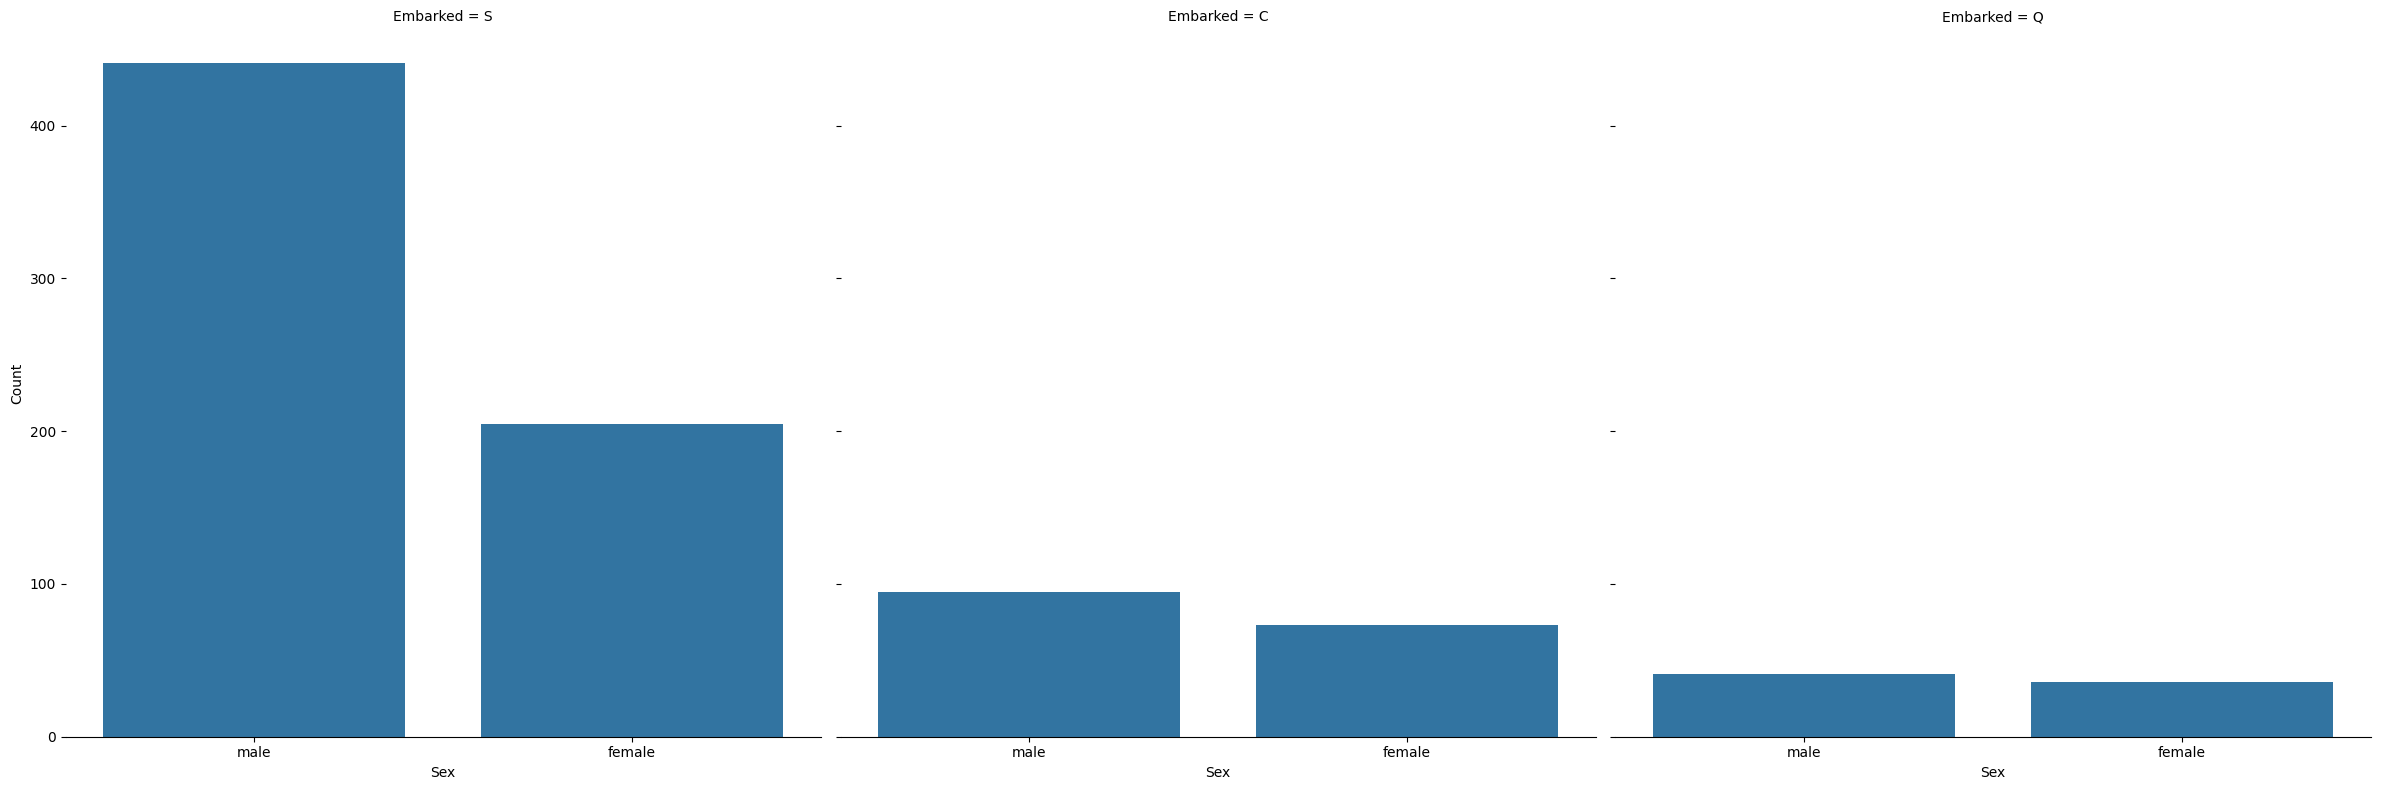

In [55]:
g = sns.catplot(x='Sex', col='Embarked', data=df, kind='count', height=8)
g.despine(left=True)
g.set_ylabels("Count")

# Data Preprocessing

##**Handling  Null Values**

In [60]:
mean = df['Age'].mean()
std   = df['Age'].std()
is_null = df['Age'].isnull().sum()

print(mean,std,is_null)

29.69911764705882 14.526497332334042 177


In [64]:
rand_age = np.random.randint(mean-std,mean+std,size=is_null)
print(type(rand_range))
rand_age

<class 'numpy.ndarray'>


array([25, 20, 17, 22, 17, 43, 27, 30, 35, 39, 27, 35, 16, 16, 41, 27, 19,
       16, 43, 35, 33, 33, 32, 38, 37, 39, 25, 20, 20, 19, 29, 21, 32, 16,
       39, 43, 39, 19, 21, 25, 27, 17, 35, 19, 35, 37, 42, 35, 42, 35, 41,
       37, 15, 38, 41, 38, 18, 21, 18, 20, 27, 25, 43, 20, 29, 25, 15, 43,
       25, 41, 15, 26, 32, 21, 23, 32, 38, 34, 21, 32, 35, 33, 28, 23, 30,
       33, 30, 23, 16, 31, 41, 42, 28, 17, 32, 15, 32, 16, 22, 30, 27, 17,
       38, 39, 16, 17, 18, 37, 16, 33, 36, 41, 33, 17, 40, 17, 33, 33, 38,
       18, 28, 34, 24, 34, 21, 18, 16, 15, 34, 37, 42, 18, 43, 16, 18, 40,
       32, 22, 38, 25, 34, 31, 16, 15, 33, 25, 16, 26, 15, 35, 41, 30, 31,
       39, 31, 41, 23, 25, 18, 38, 24, 34, 33, 16, 36, 19, 43, 37, 30, 39,
       19, 20, 16, 26, 38, 30, 40])

In [65]:
a=df['Age'].copy()
a[np.isnan(a)]=rand_age
df['Age']=a

In [66]:
df['Age'].isnull().sum()

0

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
df['Embarked']=df['Embarked'].fillna('S')

In [69]:
col_to_drop = ['PassengerId','Cabin','Ticket','Name']
df.drop(col_to_drop,axis=1,inplace=True)

In [71]:
genders = {'male':0,"female":1}
df['Sex']= df['Sex'].map(genders)

In [73]:
ports = {'S':0,"C":1,"Q":2}
df['Embarked']= df['Embarked'].map(ports)

In [77]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


#**Splitting data**

In [78]:
from sklearn.model_selection import train_test_split
# Input
x = df.drop('Survived',axis = 1)

# Output
y = df['Survived']

In [79]:
print(x.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0


In [80]:
print(y.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

In [82]:
print(f"training data shape = {x_train.shape}")
print(f"validation data shape = {x_test.shape}")
print(f"training data target shape = {y_train.shape}")
print(f"validation data target shape = {y_test.shape}")

training data shape = (623, 7)
validation data shape = (268, 7)
training data target shape = (623,)
validation data target shape = (268,)


#**Scaling the data**

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
x_train

array([[-1.63788124, -0.72077194, -1.83689932, ...,  1.99885349,
         0.98099823, -0.55489425],
       [ 0.80326712, -0.72077194,  0.21608863, ..., -0.47932706,
        -0.46963364, -0.55489425],
       [ 0.80326712,  1.38740139, -2.05686231, ...,  0.75976322,
        -0.40613632, -0.55489425],
       ...,
       [ 0.80326712, -0.72077194,  0.87597762, ..., -0.47932706,
        -0.34778742, -0.55489425],
       [-1.63788124,  1.38740139, -1.10368933, ...,  1.99885349,
         1.72907416, -0.55489425],
       [-1.63788124, -0.72077194, -0.59044235, ...,  0.75976322,
         0.8913508 , -0.55489425]])

#**Training**

# **<font color = "green">Classification Algorithms</font>**

In [87]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [88]:
logreg.fit(x_train,y_train)
svc_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
knn_classifier.fit(x_train,y_train)
nb_classifier.fit(x_train,y_train)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [89]:
logreg_ypred = logreg.predict(x_test)
svc_classifier_ypred = svc_classifier.predict(x_test)
dt_classifier_ypred = dt_classifier.predict(x_test)
knn_classifier_ypred = knn_classifier.predict(x_test)
nb_classifier_ypred = nb_classifier.predict(x_test)
rf_classifier_ypred = rf_classifier.predict(x_test)

In [91]:
from sklearn.metrics import classification_report

logreg_metrics = classification_report(y_test, logreg_ypred)
svc_classifier_metrics = classification_report(y_test, svc_classifier_ypred)
dt_classifier_metrics = classification_report(y_test, dt_classifier_ypred)
knn_classifier_metrics = classification_report(y_test, knn_classifier_ypred)
nb_classifier_metrics = classification_report(y_test, nb_classifier_ypred)
rf_classifier_metrics = classification_report(y_test, rf_classifier_ypred)

In [94]:
print("Logistic Regression Results : ")
print(logreg_metrics)
print("Support Vector Classifier Results : ")
print(svc_classifier_metrics)
print("Decision Tree Classifier Results : ")
print(dt_classifier_metrics)
print("Kth Nearest Neighbor Classifier Results : ")
print(knn_classifier_metrics)
print("Naive Bayes Classifier Results : ")
print(nb_classifier_metrics)
print("Random Forest Classifier Results : ")
print(rf_classifier_metrics)

Logistic Regression Results : 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

Support Vector Classifier Results : 
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       157
           1       0.87      0.66      0.75       111

    accuracy                           0.82       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268

Decision Tree Classifier Results : 
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       157
           1       0.69      0.71      0.70       111

    accuracy                           0.75       268
   macro avg       0.74 